In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/mental-health-dataset/Mental Health Dataset.csv


In [2]:
# Import additional libraries
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load data
df = pd.read_csv('/kaggle/input/mental-health-dataset/Mental Health Dataset.csv')
df.head()

,Timestamp,Gender,Country,Occupation,self_employed,family_history,treatment,Days_Indoors,Growing_Stress,Changes_Habits,Mental_Health_History,Mood_Swings,Coping_Struggles,Work_Interest,Social_Weakness,mental_health_interview,care_options
0,8/27/2014 11:29,Female,United States,Corporate,NaN,No,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Not sure
1,8/27/2014 11:31,Female,United States,Corporate,NaN,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,No
2,8/27/2014 11:32,Female,United States,Corporate,NaN,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Yes
3,8/27/2014 11:37,Female,United States,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,Maybe,Yes
4,8/27/2014 11:43,Female,United States,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Yes


## PART 1: Cleaning and exploring the dataset

In [4]:
# Standardise column names
df = df.rename(columns={'Timestamp':'timestamp', 'Gender':'gender', 'Country':'country', 'Occupation':'occupation', 'Days_Indoors':'days_indoors', 'Growing_Stress':'growing_stress', 'Changes_Habits':'changes_habits', 'Mental_Health_History':'mh_history', 'Mood_Swings':'mood_swings', 'Coping_Struggles':'coping_struggles', 'Work_Interest':'work_interest', 'Social_Weakness':'social_weakness' })

In [5]:
# Check for null values
df.isnull().sum()

timestamp                     0
gender                        0
country                       0
occupation                    0
self_employed              5202
family_history                0
treatment                     0
days_indoors                  0
growing_stress                0
changes_habits                0
mh_history                    0
mood_swings                   0
coping_struggles              0
work_interest                 0
social_weakness               0
mental_health_interview       0
care_options                  0
dtype: int64

In [6]:
# Gain more info on the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292364 entries, 0 to 292363
Data columns (total 17 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   timestamp                292364 non-null  object
 1   gender                   292364 non-null  object
 2   country                  292364 non-null  object
 3   occupation               292364 non-null  object
 4   self_employed            287162 non-null  object
 5   family_history           292364 non-null  object
 6   treatment                292364 non-null  object
 7   days_indoors             292364 non-null  object
 8   growing_stress           292364 non-null  object
 9   changes_habits           292364 non-null  object
 10  mh_history               292364 non-null  object
 11  mood_swings              292364 non-null  object
 12  coping_struggles         292364 non-null  object
 13  work_interest            292364 non-null  object
 14  social_weakness     

In [7]:
df.select_dtypes('object').describe()

,timestamp,gender,country,occupation,self_employed,family_history,treatment,days_indoors,growing_stress,changes_habits,mh_history,mood_swings,coping_struggles,work_interest,social_weakness,mental_health_interview,care_options
count,292364,292364,292364,292364,287162,292364,292364,292364,292364,292364,292364,292364,292364,292364,292364,292364,292364
unique,580,2,35,5,2,2,2,5,3,3,3,3,2,3,3,3,3
top,8/27/2014 11:43,Male,United States,Housewife,No,No,Yes,1-14 days,Maybe,Yes,No,Medium,No,No,Maybe,No,No
freq,2384,239850,171308,66351,257994,176832,147606,63548,99985,109523,104018,101064,154328,105843,103393,232166,118886


In [8]:
df.shape

(292364, 17)

In [9]:
# Convert timestamp into datetime format
df.timestamp = pd.to_datetime(df.timestamp)

# Extract year from timestamp
df['year'] = df.timestamp.dt.year

# Extract month from timestamp
df['month'] = df.timestamp.dt.month

In [10]:
# Check for new columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292364 entries, 0 to 292363
Data columns (total 19 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   timestamp                292364 non-null  datetime64[ns]
 1   gender                   292364 non-null  object        
 2   country                  292364 non-null  object        
 3   occupation               292364 non-null  object        
 4   self_employed            287162 non-null  object        
 5   family_history           292364 non-null  object        
 6   treatment                292364 non-null  object        
 7   days_indoors             292364 non-null  object        
 8   growing_stress           292364 non-null  object        
 9   changes_habits           292364 non-null  object        
 10  mh_history               292364 non-null  object        
 11  mood_swings              292364 non-null  object        
 12  coping_struggles

In [11]:
# Find out the unique years the surveys were obtained from
np.unique(df['year'])

array([2014, 2015, 2016], dtype=int32)

In [12]:
# Find out the unique months in the years that the surveys were obtained from
np.unique(df['month'])

array([ 2,  4,  5,  6,  7,  8,  9, 10, 11, 12], dtype=int32)

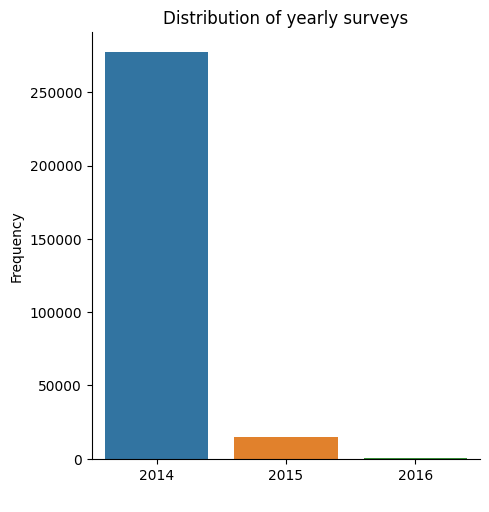

In [44]:
# Distribution of surveys by year
#plt.figure(figsize=(10, 4))
sns.catplot(x='year', data=df, kind='count', height=5)
plt.title('Distribution of yearly surveys')
plt.xlabel(' ')
plt.ylabel('Frequency')
plt.show()

The majority of the surveys in the dataset was collected from 2014. Those from 2015 and 2016 only made up for a tiny fraction.

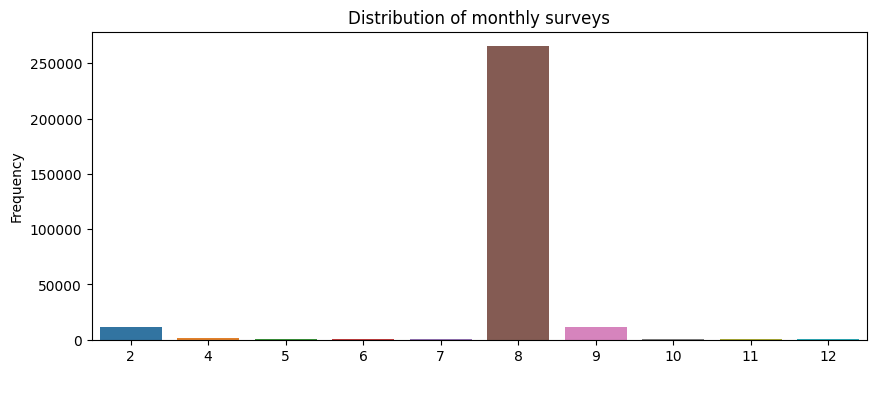

In [14]:
# Distribution of surveys by month
plt.figure(figsize=(10, 4))
sns.countplot(x='month', data=df)
plt.title('Distribution of monthly surveys')
plt.xlabel(' ')
plt.ylabel('Frequency')
plt.show()

Most surveys were collected during the month of August. It's important to keep in mind that seasons can influence the mental wellbeing of many - in both good and bay ways.

## PART 2: Factors that influence mental wellbeing

We will investigate how the following factors may impact one's mental health:
1. Employment
2. Sex
3. Family history
4. Living circumstances

### 1. Employment

Employment status is known to have a huge impact on one's wellbeing, be it mentally or physically. This section will attempt to uncover some insights that may or may not support this well known claim. 

In [15]:
# List all the occupations in the dataset
print(np.unique(df['occupation']))


['Business' 'Corporate' 'Housewife' 'Others' 'Student']


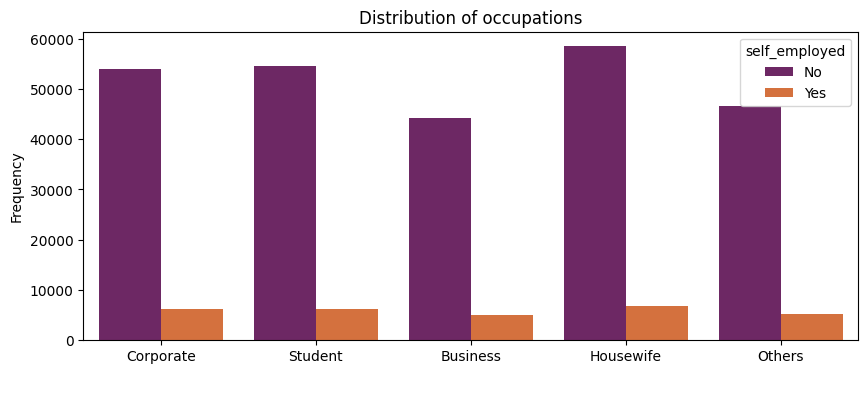

In [16]:
# Visualise the proportion of these occupations are self-employed or not
plt.figure(figsize=(10, 4))
sns.countplot(x='occupation', data=df, palette = 'inferno', hue='self_employed')
plt.title('Distribution of occupations')
plt.xlabel(' ')
plt.ylabel('Frequency')
plt.show()

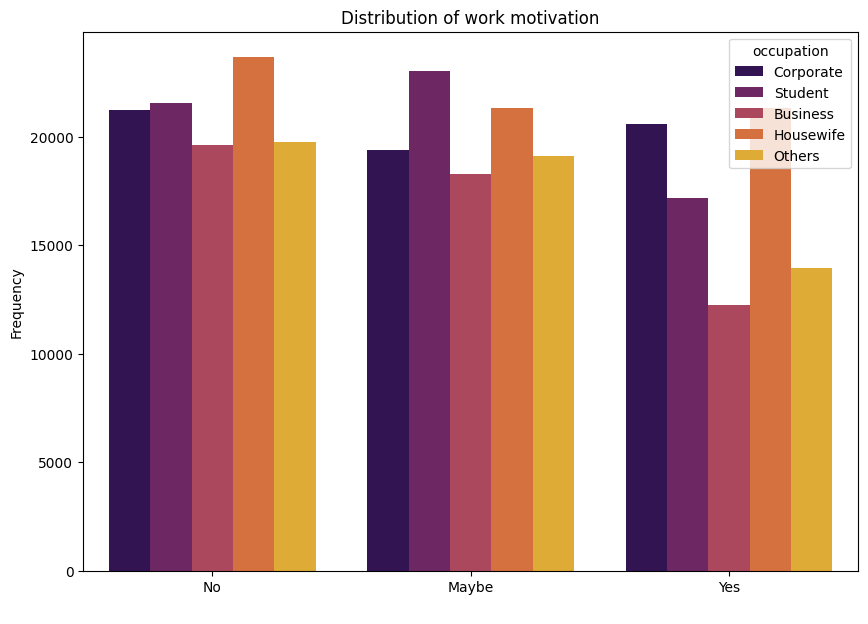

In [17]:
# Check all the unique values for work_interest
#np.unique(df['work_interest'])

# Visualise the proportion of work interest for every occupation
plt.figure(figsize=(10, 7))
sns.countplot(x='work_interest', data=df, palette = 'inferno', hue='occupation')
plt.title('Distribution of work motivation')
plt.xlabel(' ')
plt.ylabel('Frequency')
plt.show()

This result showed that the housewife made up for both the least and most motivated groups. They also have a high occurance of maybe's. The corporate came second in the most motivated group, but also not far behind in the least motivated. This trend found in the corporate seems to resonate amongst the students too. The business group is the only one that has significantly lower motivated individuals and much higher unmotivated individuals. 

The dataset does not provide any strong relationship between occupation and work motivation.

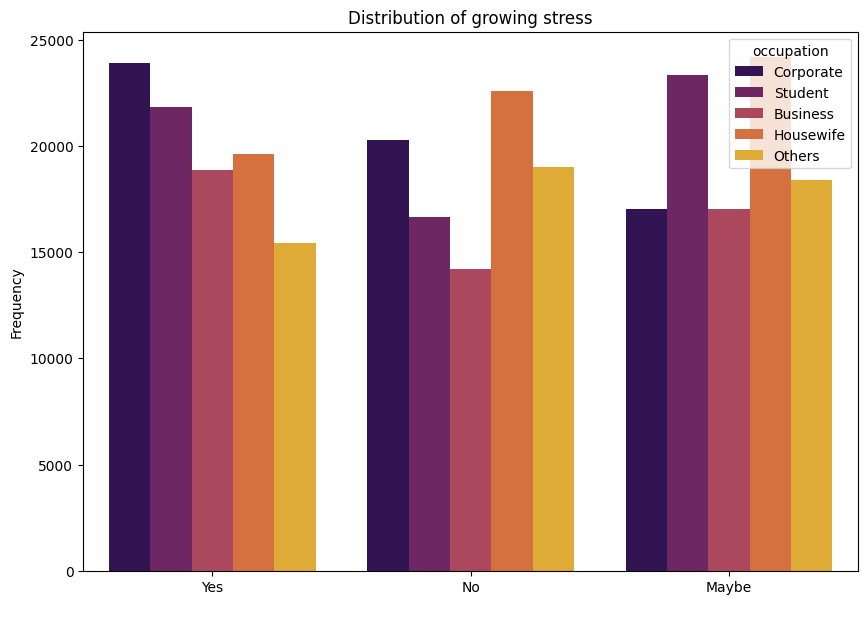

In [18]:
# Check all the unique values for growing stress
np.unique(df['growing_stress'])

# Visualise the proportion of growing stress for every occupation
plt.figure(figsize=(10, 7))
sns.countplot(x='growing_stress', data=df, palette = 'inferno', hue='occupation')
plt.title('Distribution of growing stress')
plt.xlabel(' ')
plt.ylabel('Frequency')
plt.show()

The dataset shows that the highest growing stress is found amongst the corporate individuals, followed by the student, housewife, business and others. However, there's also a high number of corporate individuals that did not experience growing stress, albeit being dominated by the housewife in that category.

This dataset that does not support assumptions that occupations (at least on its own), are directly responsible for growing stress.

## 2. Sex

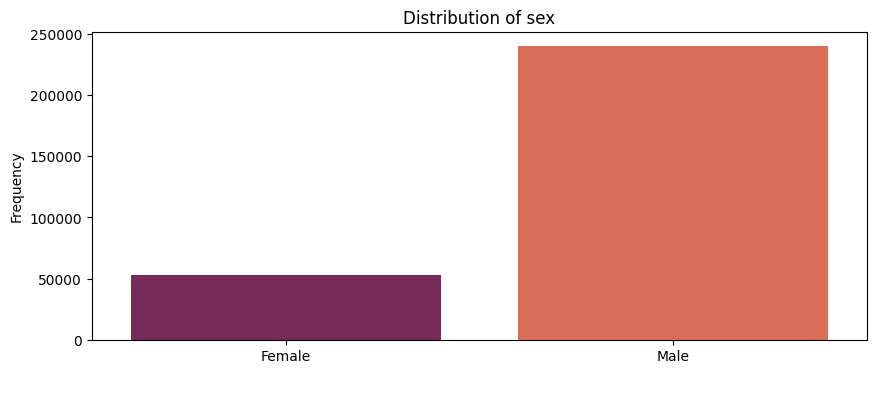

In [19]:
# Visualise the distribution of sex
plt.figure(figsize=(10, 4))
sns.countplot(x='gender', data=df, palette='rocket')
plt.title('Distribution of sex')
plt.xlabel(' ')
plt.ylabel('Frequency')
plt.show()

The dataset contains about 5 times more male than female. This can significantly skew the results and render them inaccurate.

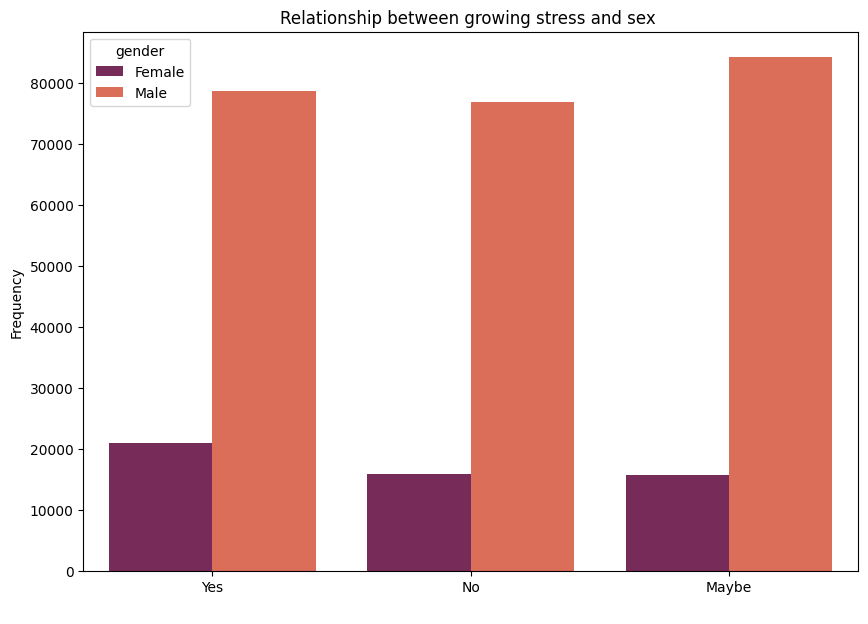

In [20]:
# Correlation between growing stress and sex
plt.figure(figsize=(10, 7))
sns.countplot(x='growing_stress', data=df, hue='gender',  palette = 'rocket')
plt.title('Relationship between growing stress and sex ')
plt.xlabel(' ')
plt.ylabel('Frequency')
plt.show()

This graph may seem informative at first glance, but keep in mind that the male:female dataset ratio is about 5:1. Therefore this graph should not be used without precaution.

**CONCLUSION:** Investigating mental wellbeing between sex could potentially provide a wide range of insights. These insights could be used to further understand sociological and psychological aspects of mental health, amongst others. However this dataset does not provide a fair male:female ratio to proceed this analysis with.

## 3. Family history

This section will investigate if family history has significant contribution to mental wellbeing.

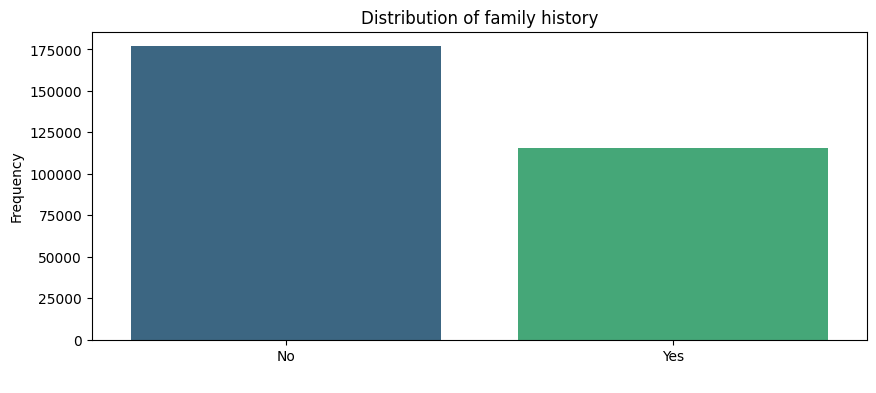

In [21]:
# Visualise the distribution of mental health history
plt.figure(figsize=(10, 4))
sns.countplot(x='family_history', data=df,  palette = 'viridis')
plt.title('Distribution of family history')
plt.xlabel(' ')
plt.ylabel('Frequency')
plt.show()

The dataset contains more respondents with no mental history than with.

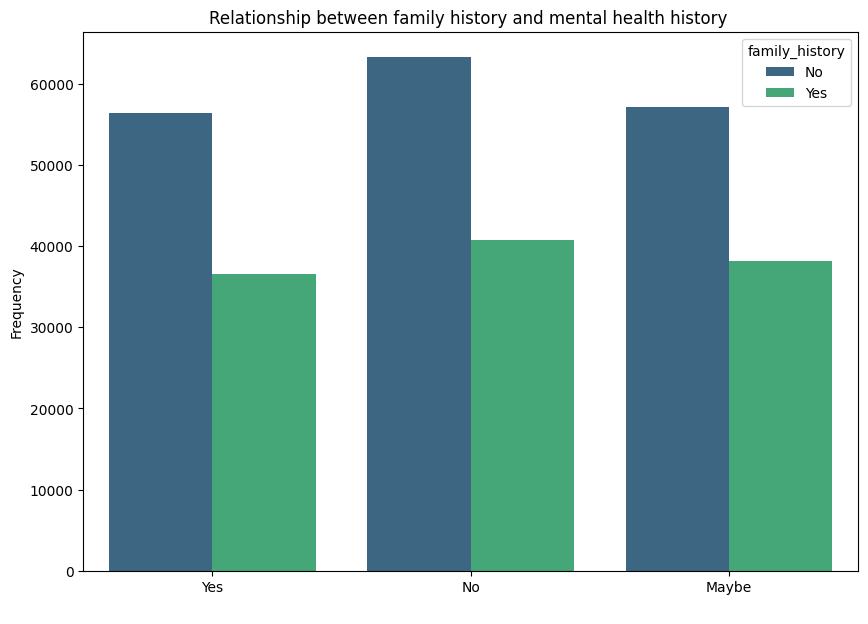

In [22]:
# Correlation between family history and mh history
plt.figure(figsize=(10, 7))
sns.countplot(x='mh_history', data=df, hue='family_history',  palette = 'viridis')
plt.title('Relationship between family history and mental health history ')
plt.xlabel(' ')
plt.ylabel('Frequency')
plt.show()

Amongst the data of individuals with mental health history, there is a higher occurence amongst those without family history. Surprisingly, this trend is also observed in two other groups of mental health history.

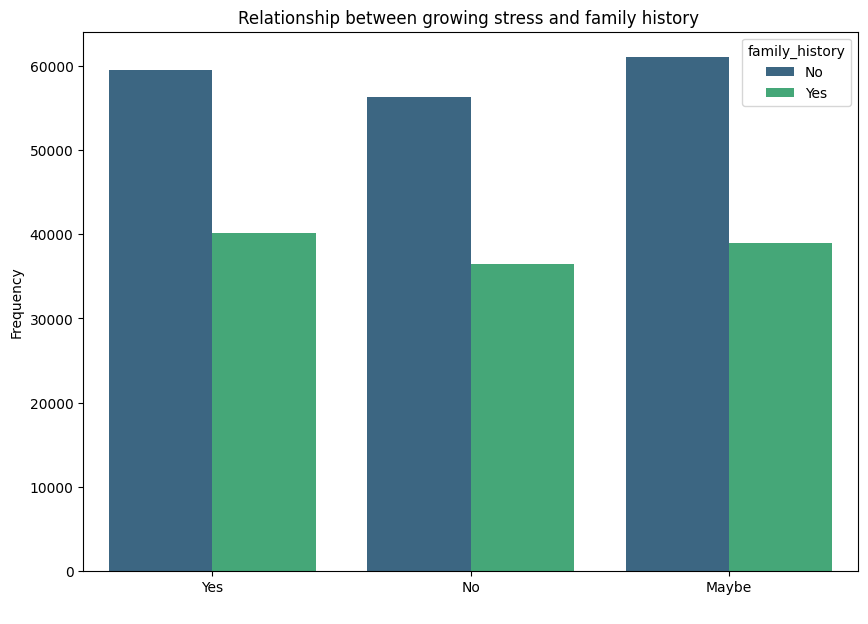

In [23]:
# Correlation between growing stress and family history
plt.figure(figsize=(10, 7))
sns.countplot(x='growing_stress', data=df, hue='family_history',  palette = 'viridis')
plt.title('Relationship between growing stress and family history ')
plt.xlabel(' ')
plt.ylabel('Frequency')
plt.show()

The dataset reports higher occurence of individuals with no family history in all categories of stress potential.

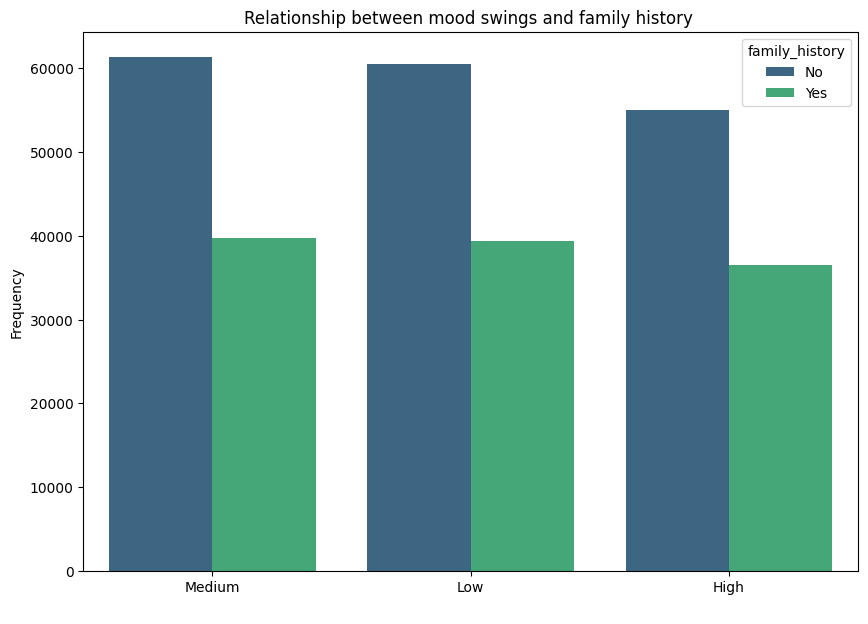

In [24]:
# Correlation between mood swings and family history
plt.figure(figsize=(10, 7))
sns.countplot(x='mood_swings', data=df, hue='family_history',  palette = 'viridis')
plt.title('Relationship between mood swings and family history ')
plt.xlabel(' ')
plt.ylabel('Frequency')
plt.show()

The dataset reports higher occurence of individuals with no family history in all categories of mood swings.

**CONCLUSION:** In contrary to the popular assumption, this dataset suggests that having no family history has greater influence on the parameters used to measure mental wellbeing.

## 4. Living circumstances

How do different living circumstances affect mental wellbeing?

Location and mental wellbeing.

Text(0.5, 0, '')

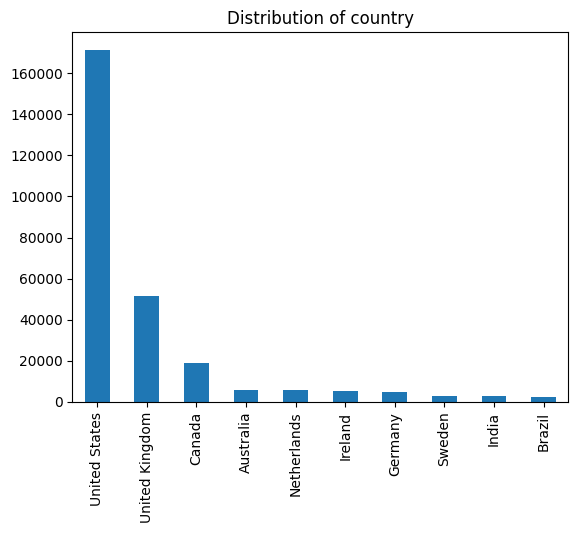

In [25]:
# Top 10 country in the dataset
country_count = df.groupby(['country']).agg(total_count=('treatment', 'count')).sort_values('total_count', ascending=False)
t10 = country_count.head(10)
t10.plot(kind='bar', legend=False)
plt.title('Distribution of country')
plt.xlabel('')

In [26]:
## Interactive graph for distribution of country
#import plotly.graph_objects as go

# Top 10 country in the dataset
#country_count = df.groupby(['country']).agg(total_count=('treatment', 'count')).sort_values('total_count', ascending=False)
#t10 = country_count.head(10)
#go.Figure(
#    data = go.Bar(x=t10.index, y=t10['total_count']),
#    layout = go.Layout(
#        title='Top 10 countries',
#        yaxis=dict(
#            title='Count'
#        )
#    )
#).show(renderer='iframe')

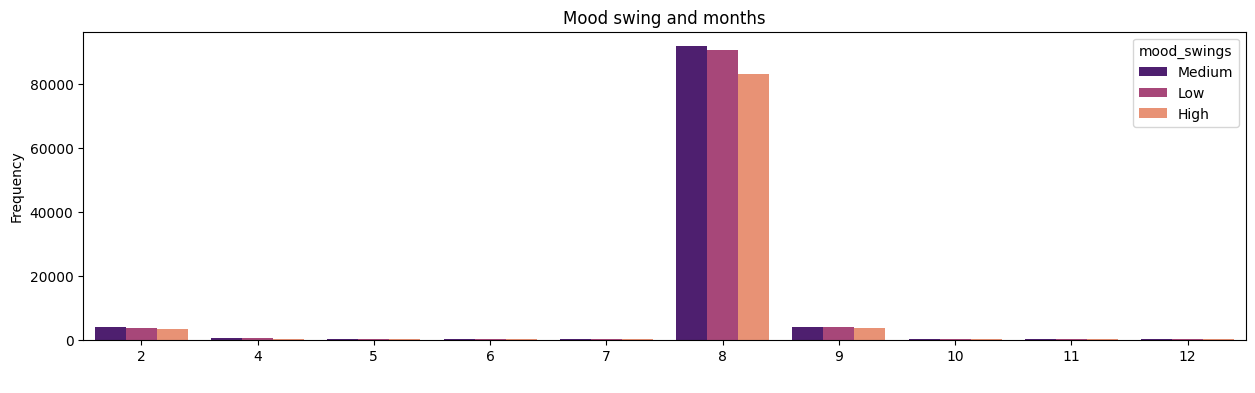

In [27]:
# Correlation between mood swings across months
plt.figure(figsize=(15, 4))
sns.countplot(x='month', data=df, hue='mood_swings',  palette = 'magma')
plt.title('Mood swing and months')
plt.xlabel(' ')
plt.ylabel('Frequency')
plt.show()

Almost all of the top 10 countries experience seasonal changes. It would be interesting to investigate if seasons have any significant influence on different factors such as mood swings. Unfortunately the dataset is limited as such and therefore cannot be used for this purpose:
1. Missing data from January and March
2. The majority of data was collected in August

In [28]:
# Since the US makes up the most in the dataset, let's investigate more using this subset.
# Create dataset for US
#usa = df[df.country=='United States'].copy()
#usa.year = pd.to_datetime(usa.year, format= '%y-%m,-%d')
#usa['yearly'] = usa.year.dt.yearly
#usa.groupby['yearly'].agg(total_count=('treatment', 'count')).plot()

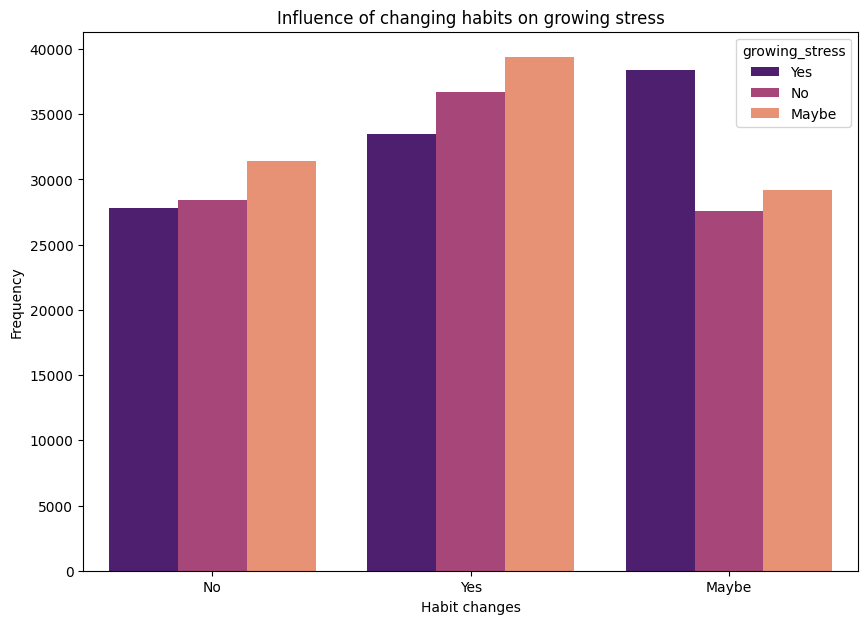

In [29]:
# Correlation between growing stress and habit changing
plt.figure(figsize=(10, 7))
sns.countplot(x='changes_habits', data=df, hue='growing_stress',  palette = 'magma')
plt.title('Influence of changing habits on growing stress')
plt.xlabel('Habit changes')
plt.ylabel('Frequency')
plt.show()

It makes sense to assume that growing_stress trend would decrease if one is willing to change habit. 

However, the dataset suggests that amongst individuals who do not change their habits, there is very little difference in the trajectory of their growing_stress. 

Amongst those who do change their habits, most seem to be unable to rate their stress growth. This suggests that their habit changes may or may not have any influence on improving their stress level.

Interestingly, amongst those indecisive on making habit changes, most have identified this with increased stress level.

This suggests that changing habits improves mental wellbeing, in comparison to not doing anything at all, which causes adverse effects.

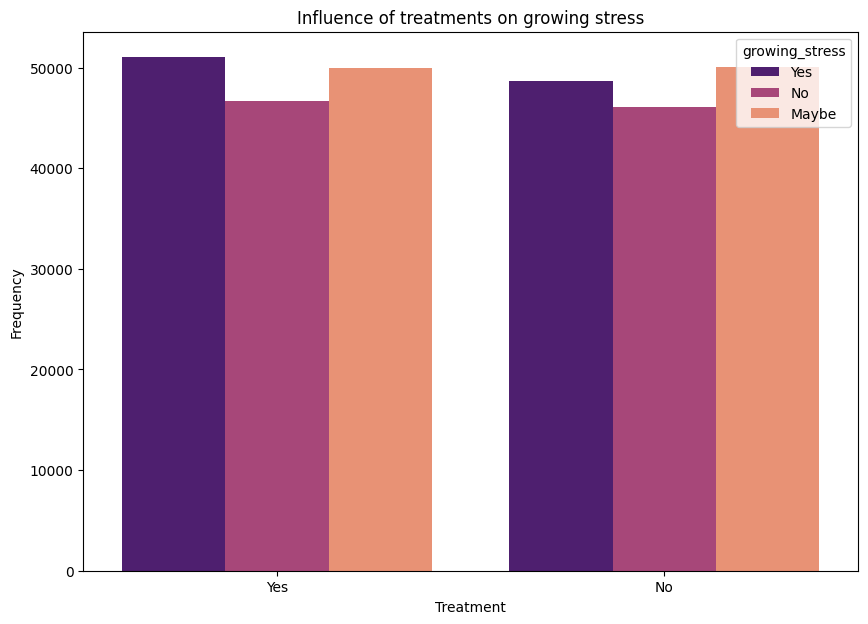

In [30]:
# Correlation between growing stress and treatment
plt.figure(figsize=(10, 7))
sns.countplot(x='treatment', data=df, hue='growing_stress',  palette = 'magma')
plt.title('Influence of treatments on growing stress')
plt.xlabel('Treatment')
plt.ylabel('Frequency')
plt.show()

There is no significant difference between groups that received treatments and those that did not. 

However, it is interesting to note that amongst those who reported increasing stress are the individuals who received treatments outnumbered those who did not, albeit by a tiny margin.

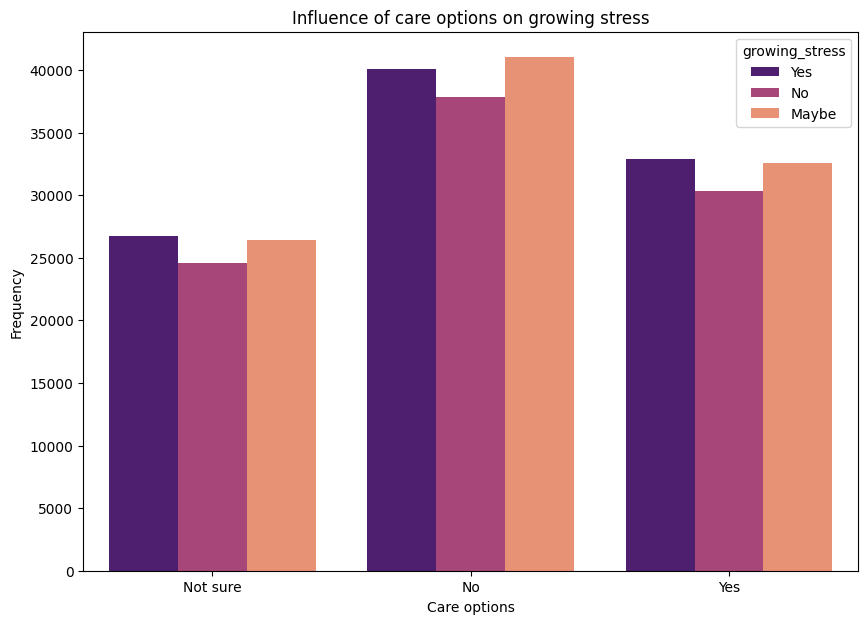

In [31]:
# Correlation between growing stress and care options
plt.figure(figsize=(10, 7))
sns.countplot(x='care_options', data=df, hue='growing_stress',  palette = 'magma')
plt.title('Influence of care options on growing stress')
plt.xlabel('Care options')
plt.ylabel('Frequency')
plt.show()

Groups of individuals with no care options dominated the dataset. Within this, most individuals could not rate their stress level. Amongst those who can, more identified an increased in stress compared to otherwise.

This trend is **consistent across the other groups of care options**. This observation somewhat suggests that being provided with care options potentially improves on mental wellbeing. 



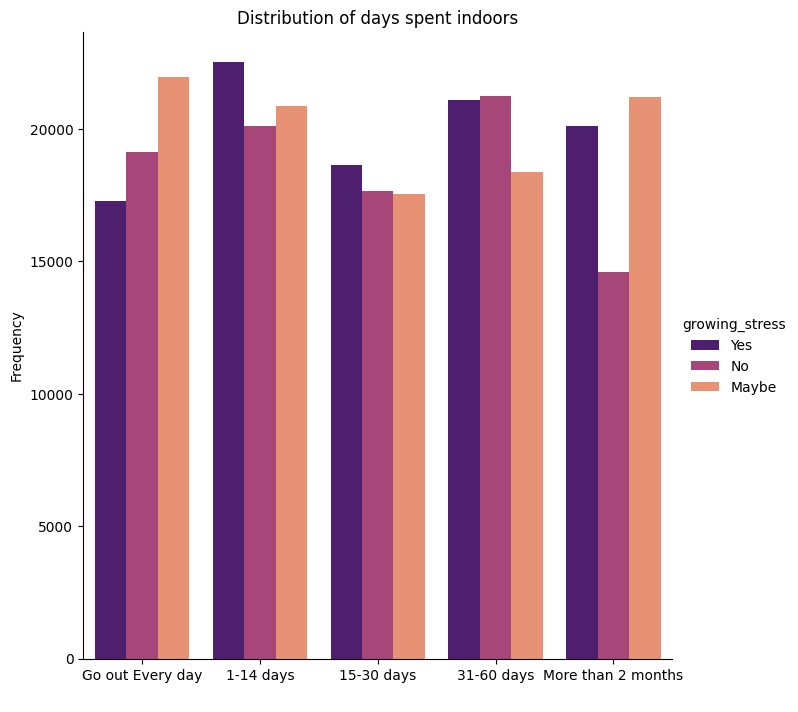

In [40]:
# Check all the unique values for days indoors 
#np.unique(df['days_indoors'])

# Visualise the proportion of days indoors for every occupation
#plt.figure(figsize=(15, 7))
category_order=['Go out Every day', '1-14 days', '15-30 days', '31-60 days', 'More than 2 months']
sns.catplot(x='days_indoors', data=df, kind= 'count', palette = 'magma', hue='growing_stress', \
            order=category_order, height=7)
plt.title('Distribution of days spent indoors')
plt.xlabel(' ')
plt.ylabel('Frequency')
plt.show()

Within the group of individuals who enjoyed daily outings, those who reported Yes for growing_stress is lower than those who reported Yes. The Maybe is the highest. 

Within the group of individuals who spent 1-14 days indoors, those who reported Yes for growing_stress is higher than those who reported No. 

Within the group of individuals who spent 15-30 days indoors, those who reported Yes for growing_stress is higher than those who reported No. 

Within the group of individuals who spent 31-60 days indoors, those who reported Yes and No for growing_stress are about the same. The Maybe is way lower than Yes and No. 

Within the group of individuals who spent 2 months indoors, individuals reported Yes for growing_stress is much higher than those who reported No. The Maybe is the highest.

# SUMMARY

**1. Employment**
* No strong relationship between different occupations causing direct impact on stress and/or work motivation.
* Housewife makes up both the most and least motivated groups.

**2. Sex**
* Dataset is overrepresting males by 5:1 ratio. 
* This is a limitation that greatly impacted the analysis. Males and females experience and interprate the world differently - which have great influence on their health in general, but more specifically, mentally.

**3. Family history**
* Most respondents in the dataset did not have a family history.
* Analysis suggested that having no family history has stronger correlation to developing stress. However, this could be due to the overrepresentation of individuals with no family history.

**4. Living circumstances**
* The dataset predominantly comprises of the US.
* Dataset centred around August, rather than all year round. Due to the dynamics and complexity of mental health, it would be ideal to have dataset that ranges from all year long to account for any seasonalities.
* Changing habits improve stress, whilst not doing anything was found to worsen stress level.
* Having car options made available can potentially improve mental wellbeing too.
* The number of days spent indoors greatly influence stress level. Daily outing is the only way to control stress level. Spending time indoors for more than 1 day is enough to lead to increased stress level.